In [14]:
;pwd

/Users/Jorge/projects/Apophis/notebooks


In [1]:
]activate ..

In [2]:
using Apophis

┌ Info: Precompiling Apophis [b41c07a2-2abb-11e9-070a-c3c1b239e7df]
└ @ Base loading.jl:1186
┌ Info: Recompiling stale cache file /Users/Jorge/.julia/compiled/v1.1/TaylorIntegration/QTEVa.ji for TaylorIntegration [92b13dbe-c966-51a2-8445-caca9f8a7d42]
└ @ Base loading.jl:1184


length(methods(RNp1BP_pN_A_J234E_J2S_ng!)) = 1
length(methods(TaylorIntegration.jetcoeffs!)) = 3
methods(RNp1BP_pN_A_J234E_J2S_ng!) = # 1 method for generic function "RNp1BP_pN_A_J234E_J2S_ng!":
[1] RNp1BP_pN_A_J234E_J2S_ng!(t, q, dq) in Apophis at /Users/Jorge/projects/Apophis/src/Apophis.jl:114
t0 == 2.4547335e6 = true


In [3]:
# using TaylorIntegration, LinearAlgebra # Apophis.jl @reexports TaylorIntegration and LinearAlgebra
using Plots, JLD, DelimitedFiles, Dates
using Statistics: mean, std
using AstroTime

In [4]:
vars = ["tv_jpl_integ", "xv1", "tvS1", "xvS1", "gvS1"] #names of variables
for i in eachindex(vars)
    filename = string("Apophis_jt_", vars[i], ".jld")
    filename
    ex = Symbol(vars[i])
    @eval $ex = load($filename, vars[$i])

    #read solution from files and assign recovered variable to recovered_sol_i
    # recovered_sol_i = load(filename, vars[i])

    #check that solution was recovered succesfully
    # @show recovered_sol_i == sol[i]
end

In [5]:
sort(union(apophisdofs, ssdofs)) == collect(1:72)

true

In [20]:
diff(tv_jpl_integ)[21:end]

9-element Array{Float64,1}:
  0.05555555550381541
  0.9375000004656613 
 31.775000009220093  
  0.02847222238779068
  0.9798611109144986 
  0.9791666669771075 
  0.03333333367481828
  0.9847222222015262 
 22.95486111473292   

In [13]:
all(  diff(tv_jpl_integ) .> 0  )

true

In [6]:
xv1[2,apophisdofs]

6-element Array{Taylor1{Float64},1}:
  NaN + 𝒪(t¹)
  NaN + 𝒪(t¹)
  NaN + 𝒪(t¹)
  NaN + 𝒪(t¹)
  NaN + 𝒪(t¹)
  NaN + 𝒪(t¹)

In [7]:
xv1[2,sundofs]

6-element Array{Taylor1{Float64},1}:
  NaN + 𝒪(t¹)
  NaN + 𝒪(t¹)
  NaN + 𝒪(t¹)
  NaN + 𝒪(t¹)
  NaN + 𝒪(t¹)
  NaN + 𝒪(t¹)

In [8]:
xv1[20,ssdofs[end-6:end]]

7-element Array{Taylor1{Float64},1}:
  NaN + 𝒪(t¹)
  NaN + 𝒪(t¹)
  NaN + 𝒪(t¹)
  NaN + 𝒪(t¹)
  NaN + 𝒪(t¹)
  NaN + 𝒪(t¹)
  NaN + 𝒪(t¹)

In [6]:
jpl_radar = readdlm("../Apophis_JPL_data.dat", '\t')

46×9 Array{Any,2}:
 "99942 Apophis (2004 MN4)"  …  0.25   "Hz"  2380  251  251  "C"
 "99942 Apophis (2004 MN4)"     4.0    "us"  2380  251  251  "C"
 "99942 Apophis (2004 MN4)"     0.25   "Hz"  2380  251  251  "C"
 "99942 Apophis (2004 MN4)"     4.5    "us"  2380  251  251  "C"
 "99942 Apophis (2004 MN4)"     0.15   "Hz"  2380  251  251  "C"
 "99942 Apophis (2004 MN4)"  …  0.2    "Hz"  2380  251  251  "C"
 "99942 Apophis (2004 MN4)"     0.1    "Hz"  2380  251  251  "C"
 "99942 Apophis (2004 MN4)"     0.25   "Hz"  8560  253  253  "C"
 "99942 Apophis (2004 MN4)"     0.1    "Hz"  8560  253  253  "C"
 "99942 Apophis (2004 MN4)"     0.25   "us"  8560  253  253  "C"
 "99942 Apophis (2004 MN4)"  …  0.25   "us"  8560  253  253  "C"
 "99942 Apophis (2004 MN4)"     0.1    "Hz"  8560  253  253  "C"
 "99942 Apophis (2004 MN4)"     3.0    "us"  8560  253  253  "C"
 ⋮                           ⋱                  ⋮               
 "99942 Apophis (2004 MN4)"     0.1    "Hz"  8560  253  253  "C"
 "9994

findall(x -> x == "Hz", jpl_radar[:,5])

findall(x -> x == "us", jpl_radar[:,5])

hola1 = jpl_radar[:,5] .== "Hz"
hola2 = jpl_radar[:,5] .== "us"
hola3 = hola1 .| hola2
hola4 = hola1 .& hola2
all(hola3), !any(hola4)

jpl_radar[:,2]

In [48]:
#construct vector of observation times
#####`union` removes repeated elements
#NOTE: resulting vector does not include t0
# tv_jpl = union( Dates.datetime2julian.(  DateTime.(jpl_radar[:,2], "y-m-d H:M:S")) );
df_jpl = "y-m-d H:M:S"
tv_jpl = Dates.datetime2julian.(  DateTime.(jpl_radar[:,2], df_jpl));

In [53]:
        # read Apophis radar astrometry from JPL date
        jpl_radar = readdlm("../Apophis_JPL_data.dat", '\t')
        # JPL date/time format
        df_jpl = "y-m-d H:M:S"
        #construct vector of observation times
        tv_jpl_all = Dates.datetime2julian.(  DateTime.(jpl_radar[:,2], df_jpl))
        # construct time range variable only with t0 and observation times > t0
        tv_jpl_integ = union(t0, tv_jpl_all[8:end])

30-element Array{Float64,1}:
 2.4547335e6         
 2.456282965277778e6 
 2.4562839583333335e6
 2.456295888888889e6 
 2.4562959166666665e6
 2.456295951388889e6 
 2.456297861111111e6 
 2.4562979444444445e6
 2.456297951388889e6 
 2.456298847222222e6 
 2.4562988958333335e6
 2.456300840277778e6 
 2.4563018333333335e6
 ⋮                   
 2.456306909722222e6 
 2.4563077708333335e6
 2.4563087708333335e6
 2.456308826388889e6 
 2.456309763888889e6 
 2.456341538888889e6 
 2.4563415673611113e6
 2.456342547222222e6 
 2.4563435263888887e6
 2.4563435597222224e6
 2.4563445444444446e6
 2.4563674993055556e6

In [63]:
string(DateTime(2008,9,24,0,0,0))

"2008-09-24T00:00:00"

In [79]:
map(x->x.Δt, julian.(TDBEpoch.(UTCEpoch.(DateTime.(jpl_radar[:,2], df_jpl)[8:end]))))

39-element Array{Float64,1}:
 2.456282966055366e6 
 2.456283959110922e6 
 2.456283959110922e6 
 2.4562958896664814e6
 2.4562958896664814e6
 2.4562959174442594e6
 2.4562959521664814e6
 2.4562978618887044e6
 2.456297945222038e6 
 2.456297945222038e6 
 2.4562979521664823e6
 2.456298847999816e6 
 2.456298896610927e6 
 ⋮                   
 2.4563088271664856e6
 2.456309764666486e6 
 2.4563415396664953e6
 2.4563415681387177e6
 2.4563415681387177e6
 2.4563425479998286e6
 2.4563435271664956e6
 2.4563435604998292e6
 2.4563435604998292e6
 2.4563445452220514e6
 2.456367500083166e6 
 2.456367500083166e6 

In [81]:
vcat(t0, map(x->x.Δt, julian.(TDBEpoch.(UTCEpoch.(DateTime.(jpl_radar[:,2], df_jpl)[8:end])))))

40-element Array{Float64,1}:
 2.4547335e6         
 2.456282966055366e6 
 2.456283959110922e6 
 2.456283959110922e6 
 2.4562958896664814e6
 2.4562958896664814e6
 2.4562959174442594e6
 2.4562959521664814e6
 2.4562978618887044e6
 2.456297945222038e6 
 2.456297945222038e6 
 2.4562979521664823e6
 2.456298847999816e6 
 ⋮                   
 2.4563088271664856e6
 2.456309764666486e6 
 2.4563415396664953e6
 2.4563415681387177e6
 2.4563415681387177e6
 2.4563425479998286e6
 2.4563435271664956e6
 2.4563435604998292e6
 2.4563435604998292e6
 2.4563445452220514e6
 2.456367500083166e6 
 2.456367500083166e6 

In [55]:
tv_neodys_obs == tv_jpl_integ

true

In [49]:
tv_jpl

46-element Array{Float64,1}:
 2.453398479861111e6 
 2.4533995e6         
 2.4533995e6         
 2.4534005125e6      
 2.4534005125e6      
 2.4535902131944443e6
 2.4538620340277776e6
 2.456282965277778e6 
 2.4562839583333335e6
 2.4562839583333335e6
 2.456295888888889e6 
 2.456295888888889e6 
 2.4562959166666665e6
 ⋮                   
 2.456308826388889e6 
 2.456309763888889e6 
 2.456341538888889e6 
 2.4563415673611113e6
 2.4563415673611113e6
 2.456342547222222e6 
 2.4563435263888887e6
 2.4563435597222224e6
 2.4563435597222224e6
 2.4563445444444446e6
 2.4563674993055556e6
 2.4563674993055556e6

In [50]:
t0

2.4547335e6

In [52]:
tv_jpl .> t0

46-element BitArray{1}:
 false
 false
 false
 false
 false
 false
 false
  true
  true
  true
  true
  true
  true
     ⋮
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true

In [82]:
        # read Apophis radar astrometry from JPL date
        jpl_radar = readdlm("../Apophis_JPL_data.dat", '\t')
        # JPL date/time format
        df_jpl = "y-m-d H:M:S"
        #construct vector of observation times (UTC) > t0
        tv_jpl_utc = UTCEpoch.(DateTime.(jpl_radar[:,2], df_jpl)[8:end])
        # convert to TDB
        tv_jpl_tdb = TDBEpoch.(tv_jpl_utc)
        # date/time to Julian date
        tv_jpl_tdb_julian = julian.(tv_jpl_tdb)
        # construct time range variable with t0 and observation times > t0, removing repeated values
        tv_jpl_integ = union(t0, map(x->x.Δt, tv_jpl_tdb_julian))

30-element Array{Float64,1}:
 2.4547335e6         
 2.456282966055366e6 
 2.456283959110922e6 
 2.4562958896664814e6
 2.4562959174442594e6
 2.4562959521664814e6
 2.4562978618887044e6
 2.456297945222038e6 
 2.4562979521664823e6
 2.456298847999816e6 
 2.456298896610927e6 
 2.4563008410553723e6
 2.456301834110928e6 
 ⋮                   
 2.4563069104998186e6
 2.45630777161093e6  
 2.45630877161093e6  
 2.4563088271664856e6
 2.456309764666486e6 
 2.4563415396664953e6
 2.4563415681387177e6
 2.4563425479998286e6
 2.4563435271664956e6
 2.4563435604998292e6
 2.4563445452220514e6
 2.456367500083166e6 

In [10]:
#extract transmitter frequencies (Hz)
transmitter_freq = jpl_radar[:,6]*1e6;

In [11]:
#monostatic mode: check that each receiver and transmitter are the same
all( jpl_radar[:,7] .== jpl_radar[:,8] )

true

In [12]:
#then, get the station codes
station_codes = Int.(jpl_radar[:,7]);

In [13]:
# check that time vectors from NEODyS and JPL are the same
tv_jpl_integ == union(t0, tv_jpl[tv_jpl .> t0])

true

In [14]:
#extract time-delay and Doppler-shift measurements
#will filter those afterwards by type of measurement
deldop_jpl = jpl_radar[:, 3];

In [15]:
#get indices of delay observations
del_ind = findall(x->x == "us", jpl_radar[:,5])
#get indices of Doppler observations
dop_ind = findall(x->x == "Hz", jpl_radar[:,5]);

In [16]:
#get index vector of observation times
#takes into account only times in `tv_jpl_integ` greater than t0
radar_jpl_obs_ind = map(y->findfirst(x->x == y, tv_jpl), tv_jpl_integ[2:end])

29-element Array{Int64,1}:
  8
  9
 11
 13
 14
 15
 16
 18
 19
 20
 21
 22
 24
  ⋮
 31
 32
 33
 35
 36
 37
 38
 40
 41
 42
 44
 45

In [17]:
tv_jpl[radar_jpl_obs_ind]

29-element Array{Float64,1}:
 2.456282965277778e6 
 2.4562839583333335e6
 2.456295888888889e6 
 2.4562959166666665e6
 2.456295951388889e6 
 2.456297861111111e6 
 2.4562979444444445e6
 2.456297951388889e6 
 2.456298847222222e6 
 2.4562988958333335e6
 2.456300840277778e6 
 2.4563018333333335e6
 2.456301888888889e6 
 ⋮                   
 2.456306909722222e6 
 2.4563077708333335e6
 2.4563087708333335e6
 2.456308826388889e6 
 2.456309763888889e6 
 2.456341538888889e6 
 2.4563415673611113e6
 2.456342547222222e6 
 2.4563435263888887e6
 2.4563435597222224e6
 2.4563445444444446e6
 2.4563674993055556e6

In [18]:
#check that we got `radar_obs_ind` right
tv_jpl[radar_jpl_obs_ind] == tv_jpl_integ[2:end]

true

In [19]:
size(radar_jpl_obs_ind)

(29,)

In [20]:
size(xv1[2:end,:])

(29, 73)

In [21]:
size(tv_jpl_integ)

(30,)

In [22]:
size(station_codes[radar_jpl_obs_ind])

(29,)

In [25]:
#read NEODyS delay observations (range)
del = readdlm("../Apophis_NEODyS_DEL.dat")
#read NEODyS Doppler obs. (range-rate)
dop = readdlm("../Apophis_NEODyS_DOP.dat")
#read NEODyS delay & Doppler
deldop = readdlm("../Apophis_NEODyS.dat");

#retrieve times of delay observations
del_ind = 3:17
jd_del = Dates.datetime2julian.(  Dates.DateTime.( del[del_ind,3].*"T".*del[del_ind,4] )  )

#retrieve times of Doppler observations
dop_ind = 6:29
jd_dop = Dates.datetime2julian.(  Dates.DateTime.( dop[dop_ind,3].*"T".*dop[dop_ind,4] )  );

#check that all times in jd_dop are elements of tv_jpl_integ; do the same for jd_del
#for i in eachindex(jd_dop)
#@show in(jd_dop[i], tv_jpl_integ)
#end
;

In [26]:
# check for each delay observation that transmitting station is the same as the receiving station (monostatic)
@show all(  Int.(del[:,12]) .== Int.(del[:,13])  )
# check for each Doppler observation that transmitting station is the same as the receiving station (monostatic)
@show all(  Int.(dop[:,12]) .== Int.(dop[:,13])  )

# If checks pass, then in order to compute the observer position, we should not worry about 

all(Int.(del[:, 12]) .== Int.(del[:, 13])) = true
all(Int.(dop[:, 12]) .== Int.(dop[:, 13])) = true


true

In [27]:
del_station = del[:, 12]
dop_station = dop[:, 12];

In [28]:
length(del_station), length(dop_station)

(17, 29)

Let $\vec R$ denote the geocentric position of the observing station, $\vec \rho$ the topocentric position of the asteroid relative to the same station,  $\vec r_\mathrm{a}$ the geocentric position of the asteroid and $\vec r_\mathrm{E}$ the geocentric position of the asteroid. Then we have

$$
\vec r_\mathrm{a} =\vec r_\mathrm{E} + \vec R + \vec \rho
$$

Thus, the instantaneous topocentric range $\rho = |\vec \rho|$ of the asteroid may be computed as

$$
\rho = |\vec r_\mathrm{a} - \vec r_\mathrm{E} - \vec R| = \sqrt{(x_\mathrm{a} - x_\mathrm{E} - X)^2+(y_\mathrm{a} - y_\mathrm{E} - Y)^2+(z_\mathrm{a} - z_\mathrm{E} - Z)^2}
$$

And the instantaneous range rate $\dot \rho$ may be computed as:

$$
\dot \rho = \frac{1}{\rho}\vec{\rho} \cdot \dot{\vec{\rho}}
$$

In [29]:
dop_neodys_obs_ind = findall(x->in(x, jd_dop), tv_jpl_integ);
del_neodys_obs_ind = findall(x->in(x, jd_del), tv_jpl_integ)

# check that all elements in jd_dop/jd_del were found in tv_jpl_integ
@show length(dop_neodys_obs_ind) == length(jd_dop)
@show length(del_neodys_obs_ind) == length(jd_del)

length(dop_neodys_obs_ind) == length(jd_dop) = true
length(del_neodys_obs_ind) == length(jd_del) = true


true

In [30]:
const ea = 4 #Earth's index
const N = 12 

# Apophis geocentric range, radial velocity
r(x) = sqrt( (x[3N-2]-x[3ea-2])^2+(x[3N-1]-x[3ea-1])^2+(x[3N]-x[3ea])^2 )
vr(x) = ( (x[3N-2]-x[3ea-2])*(x[6N-2]-x[3(N+ea)-2])+(x[3N-1]-x[3ea-1])*(x[6N-1]-x[3(N+ea)-1])+(x[3N]-x[3ea])*(x[6N]-x[3(N+ea)]) )/r(x)

# Apophis topocentric range, radial velocity
function r_topo(x, station_code, jd_utc)
    r_a = [x[3N-2], x[3N-1], x[3N]] # asteroid barycentric position (au)
    r_E = [x[3ea-2], x[3ea-1], x[3ea]] # Earth barycentric position (au)
    R_station = observer_position(station_code, jd_utc)/au # station geocentric position (au)
    rho_vec = r_a - r_E - R_station
    return sqrt( rho_vec[1]^2+rho_vec[2]^2+rho_vec[3]^2 )
end

function vr_topo(x, station_code, jd_utc)
    r_a = [x[3N-2], x[3N-1], x[3N]] # asteroid barycentric position (au)
    v_a = [x[6N-2], x[6N-1], x[6N]] # asteroid barycentric velocity (au/day)
    
    r_E = [x[3ea-2], x[3ea-1], x[3ea]] # Earth barycentric position (au)
    v_E = [x[3(N+ea)-2], x[3(N+ea)-1], x[3(N+ea)]] # Earth barycentric velocity (au/day)
    
    R_station_T1 = observer_position(station_code, Taylor1([jd_utc, one(jd_utc)], 1))/au # station geocentric position (Taylor1) (au)
    R_station = [R_station_T1[1][0], R_station_T1[2][0], R_station_T1[3][0]] # station geocentric position (au)
    V_station = [R_station_T1[1][1], R_station_T1[2][1], R_station_T1[3][1]] # station geocentric velocity (au/day)
    
    ρ_vec = r_a - r_E - R_station # \vec \rho
    ρvel_vec = v_a - v_E - V_station # \dot \vec \rho
    ρ = sqrt( ρ_vec[1]^2+ρ_vec[2]^2+ρ_vec[3]^2 )
    
    return dot(ρ_vec, ρvel_vec)/ρ
end

# x: Solar System + Apophis state at receiving time
# station_code: observing station identifier (MPC nomenclature)
# t: time of echo reception (UTC/TDB?) TODO: compute TDB-UTC difference at receiving and transmitting times
# f_T: transmitter frequency
function delay_doppler(x, station_code, t, f_T)
    # Compute Taylor expansion at receiving time
    t_r = Taylor1([t, one(t)], Apophis.order)
    x_r = Taylor1.(x, Apophis.order)
    dx_r = similar(x_r)
    @time TaylorIntegration.jetcoeffs!(Val(Apophis.RNp1BP_pN_A_J234E_J2S_ng!), t_r, x_r, dx_r)
    
    r_a = x_r[apophisdofs[1:3]] # asteroid barycentric position at receiving time (au)
    r_E = x_r[(3ea-2):3ea] # Earth barycentric position (au)
    t_r_utc_julian = julian(UTCEpoch(TDBEpoch(t, origin=:julian))).Δt
    t_r_utc_julian_T = Taylor1([t_r_utc_julian, one(t_r_utc_julian)], Apophis.order)
    R_station = observer_position(station_code, t_r_utc_julian_T)/au # station geocentric position (au)
    r_r = r_E + R_station # barycentric position of receiver (au)
    
    # down-leg iteration
    # τ_D first approximation: Eq. (1) Yeomans et al. (1992)
    ρ_r_0 = r_a()-r_r()
    τ_D = sqrt(ρ_r_0[1]^2 + ρ_r_0[2]^2 + ρ_r_0[3]^2)/c_au_per_day # (days) -R_b/c, but delay is wrt asteroid Center
    # @show τ_D
    for i in 1:5
        # Eq. (3) Yeomans et al. (1992)
        ρ_r = r_a(-τ_D)-r_r()
        # Eq. (4) Yeomans et al. (1992)
        τ_D = sqrt(ρ_r[1]^2 + ρ_r[2]^2 + ρ_r[3]^2)/c_au_per_day # (days) -R_b/c (COM correction) + Δτ_D (relativistic, tropo, iono...)
        # @show τ_D
    end
    # @show τ_D
    # Eq. (2) Yeomans et al. (1992)
    t_b = -τ_D
    
    # up-leg iteration
    # τ_U first estimation: Eq. (5) Yeomans et al. (1992)
    τ_U = τ_D
    # @show τ_U
    for i in 1:5
        # Eq. (7) Yeomans et al. (1992)
        ρ_t = r_a(-τ_D)-r_r(-τ_U-τ_D)
        # Eq. (8) Yeomans et al. (1992)
        τ_U = sqrt(ρ_t[1]^2 + ρ_t[2]^2 + ρ_t[3]^2)/c_au_per_day # (days) -R_b/c (COM correction) + Δτ_U (relativistic, tropo, iono...)
        # @show τ_U
    end
    # @show τ_U
    # Eq. (6) Yeomans et al. (1992)
    t_t = t_b - τ_U

    
    v_a = x_r[apophisdofs[4:6]]
    v_E = x_r[(3(N+ea)-2):3(N+ea)]
    V_station = differentiate.(R_station)
    v_r = v_E + V_station
    # v_r is equivalent to differentiate.(r_r) except for last order terms
    # @show v_r 
    # @show differentiate.(r_r) # barycentric velocity of receiver (au)
    
    # Eq. (10) Yeomans et al. (1992)
    ρ_vec_dot_t = v_a(t_b)-v_r(t_t)
    ρ_vec_dot_r = v_a(t_b)-v_r()
    
    ρ_vec_t = r_a(t_b) - r_r(t_t)
    ρ_vec_r = r_a(t_b) - r_r()
    
    # Eq. (11) Yeomans et al. (1992)
    ρ_t = sqrt(ρ_vec_t[1]^2+ρ_vec_t[2]^2+ρ_vec_t[3]^2)
    ρ_dot_t = dot(ρ_vec_t, ρ_vec_dot_t)/ρ_t
    ρ_r = sqrt(ρ_vec_r[1]^2+ρ_vec_r[2]^2+ρ_vec_r[3]^2)
    ρ_dot_r = dot(ρ_vec_r, ρ_vec_dot_r)/ρ_r
    
    # @show ρ_dot_t
    # @show ρ_dot_r
    
    # Eq. (12) Yeomans et al. (1992)
    doppler1 = -f_T*(ρ_dot_t+ρ_dot_r)/c_au_per_day
    doppler2 = (ρ_dot_t/ρ_t)*dot(ρ_vec_t, v_r(t_t)) - (ρ_dot_r/ρ_r)*dot(ρ_vec_r, v_r()) - ρ_dot_t*ρ_dot_r
    r_s = x_r[sundofs[1:3]]
    r_ts = r_r(t_t) - r_s(t_t)
    r_rs = r_r() - r_s()
    factor = 1/sqrt(r_ts[1]^2+r_ts[2]^2+r_ts[3]^2) - 1/sqrt(r_rs[1]^2+r_rs[2]^2+r_rs[3]^2)
    doppler3 = μ[1]*factor
    doppler4 = (  dot(v_r(t_t), v_r(t_t)) - dot(v_r(), v_r())  )/2
    doppler_23 = -f_T*(doppler2 + doppler3 + doppler4)/(c_au_per_day^2)
    f_D = doppler1+doppler_23

    return τ_D + τ_U, f_D # total signal delay and Doppler shift [TODO: + (TDB - UTC)_t - (TDB - UTC)_r]
end

delay_doppler (generic function with 1 method)

In [31]:
radar_jpl_obs_ind[2]

9

In [32]:
tv_jpl[radar_jpl_obs_ind[2]]

2.4562839583333335e6

In [33]:
tv_jpl_integ[3]

2.4562839583333335e6

In [34]:
tdelay, dshift = delay_doppler(  xv1[3, :], station_codes[radar_jpl_obs_ind[2]], tv_jpl[radar_jpl_obs_ind[2]], transmitter_freq[radar_jpl_obs_ind[2]]  )

  3.425706 seconds (16.44 M allocations: 1.288 GiB, 35.07% gc time)


( 0.0011884611349871452 - 3.825947266041621e-10 t + 2.0562922325261953e-17 t² + 7.142163371817425e-24 t³ + 2.1152234507510012e-30 t⁴ + 5.568232957829371e-37 t⁵ + 1.210673492356902e-43 t⁶ + 1.6601545131049541e-50 t⁷ - 1.9818516699304308e-57 t⁸ - 2.642736391952262e-63 t⁹ - 1.261191888585742e-69 t¹⁰ + 𝒪(t¹¹),  50602.21644886468 - 0.03237031053561464 t - 6.591163544213025e-9 t² - 1.7680400555129921e-15 t³ - 3.5133637297837113e-22 t⁴ - 8.719590793486745e-30 t⁵ + 3.577549067109592e-35 t⁶ + 2.264979906434231e-41 t⁷ + 9.397807083210708e-48 t⁸ + 2.9308477312526394e-54 t⁹ + 6.1600492477171416e-61 t¹⁰ + 𝒪(t¹¹))

In [35]:
1e6*86400*tdelay

 1.0268304206288934e8 - 33.0561843785996 t + 1.7766364889026327e-6 t² + 6.170829153250256e-13 t³ + 1.827553061448865e-19 t⁴ + 4.8109532755645767e-26 t⁵ + 1.0460218973963632e-32 t⁶ + 1.4343734993226804e-39 t⁷ - 1.7123198428198921e-46 t⁸ - 2.2833242426467546e-52 t⁹ - 1.089669791738081e-58 t¹⁰ + 𝒪(t¹¹)

In [36]:
1e6*86400*tdelay()-102682986.05

56.012889340519905

In [37]:
dshift

 50602.21644886468 - 0.03237031053561464 t - 6.591163544213025e-9 t² - 1.7680400555129921e-15 t³ - 3.5133637297837113e-22 t⁴ - 8.719590793486745e-30 t⁵ + 3.577549067109592e-35 t⁶ + 2.264979906434231e-41 t⁷ + 9.397807083210708e-48 t⁸ + 2.9308477312526394e-54 t⁹ + 6.1600492477171416e-61 t¹⁰ + 𝒪(t¹¹)

In [38]:
dshift

 50602.21644886468 - 0.03237031053561464 t - 6.591163544213025e-9 t² - 1.7680400555129921e-15 t³ - 3.5133637297837113e-22 t⁴ - 8.719590793486745e-30 t⁵ + 3.577549067109592e-35 t⁶ + 2.264979906434231e-41 t⁷ + 9.397807083210708e-48 t⁸ + 2.9308477312526394e-54 t⁹ + 6.1600492477171416e-61 t¹⁰ + 𝒪(t¹¹)

In [39]:
dshift()-57880.250

-7278.033551135319

In [40]:
# get time-delay, Doppler-shift values from integration

tdelay_v1 = Array{Taylor1{Float64}}(undef, length(tv_jpl_integ)-1)
dshift_v1 = Array{Taylor1{Float64}}(undef, length(tv_jpl_integ)-1)

#tv_jpl[radar_obs_ind] == tv_jpl_integ[2:end]
for i in eachindex(tv_jpl_integ[2:end])
    j = radar_jpl_obs_ind[i]
    #@show tv_jpl[j]
    #@show tv_jpl_integ[i]
    @show tv_jpl[j] == tv_jpl_integ[i+1]
    tdelay_v1[i], dshift_v1[i] = delay_doppler(  xv1[i+1, :], station_codes[j], tv_jpl[j], transmitter_freq[j]  )
end


tv_jpl[j] == tv_neodys_obs[i + 1] = true
  2.355934 seconds (15.07 M allocations: 1.220 GiB, 46.42% gc time)
tv_jpl[j] == tv_neodys_obs[i + 1] = true
  2.424328 seconds (15.07 M allocations: 1.220 GiB, 46.90% gc time)
tv_jpl[j] == tv_neodys_obs[i + 1] = true
  2.426297 seconds (15.07 M allocations: 1.220 GiB, 48.38% gc time)
tv_jpl[j] == tv_neodys_obs[i + 1] = true
  2.536902 seconds (15.07 M allocations: 1.220 GiB, 47.90% gc time)
tv_jpl[j] == tv_neodys_obs[i + 1] = true
  2.392555 seconds (15.07 M allocations: 1.220 GiB, 48.20% gc time)
tv_jpl[j] == tv_neodys_obs[i + 1] = true
  2.475869 seconds (15.07 M allocations: 1.220 GiB, 48.66% gc time)
tv_jpl[j] == tv_neodys_obs[i + 1] = true
  2.509739 seconds (15.07 M allocations: 1.220 GiB, 47.21% gc time)
tv_jpl[j] == tv_neodys_obs[i + 1] = true
  2.439300 seconds (15.07 M allocations: 1.220 GiB, 47.95% gc time)
tv_jpl[j] == tv_neodys_obs[i + 1] = true
  2.605640 seconds (15.07 M allocations: 1.220 GiB, 47.78% gc time)
tv_jpl[j] == tv_neo

In [41]:
#get set of indices in jpl_radar[:,5] which are, resp., delay and Doppler observations (>t0)
del_ind = findall(y->y=="us", jpl_radar[:,5])[3:end]
dop_ind = findall(y->y=="Hz", jpl_radar[:,5])[6:end];

In [42]:
#get corresponding set of indices in tv_jpl_integ
tv_del_ind = findall(x->in(x, tv_jpl[del_ind]), tv_jpl_integ) .- 1
tv_dop_ind = findall(x->in(x, tv_jpl[dop_ind]), tv_jpl_integ) .- 1;

In [43]:
#check that indices are correct
union(sort(vcat(tv_del_ind, tv_dop_ind))) == collect(1:29)

true

In [44]:
# Observed minus computed (O-C) residuals

# absolute
residual_td = Float64.(jpl_radar[del_ind,3]) - 1e6*86400*tdelay_v1[tv_del_ind] # (usec)
residual_ds = Float64.(jpl_radar[dop_ind,3]) - dshift_v1[tv_dop_ind] # (Hz)

# relative
rel_res_td = residual_td ./ Float64.(jpl_radar[del_ind,3]) # (usec)
rel_res_ds = residual_ds ./ Float64.(jpl_radar[dop_ind,3]); # (Hz)

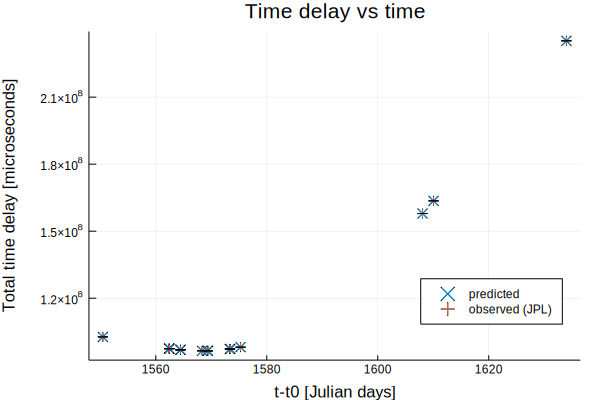

In [45]:
scatter(
    tv_jpl_integ[tv_del_ind .+ 1].-t0,
    1e6*86400*tdelay_v1[tv_del_ind](),
    label="predicted",
    marker=:xcross
)
scatter!(
    tv_jpl_integ[tv_del_ind .+ 1].-t0,
    Float64.(jpl_radar[del_ind,3]),
    label="observed (JPL)",
    legend=:bottomright,
    marker=:cross,
    yerror=Float64.(jpl_radar[del_ind,4])
)
title!("Time delay vs time")
xlabel!("t-t0 [Julian days]")
ylabel!("Total time delay [microseconds]")

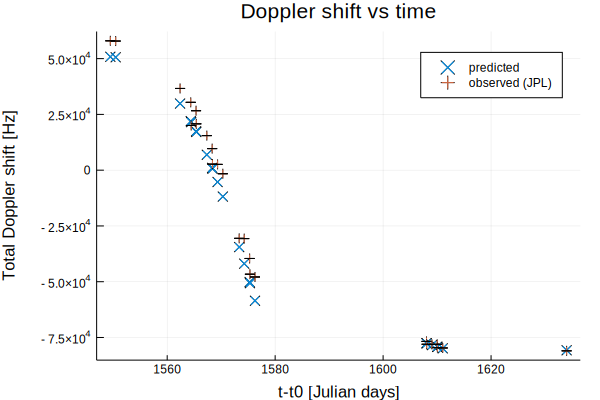

In [46]:
scatter(
    tv_neodys_obs[tv_dop_ind .+ 1].-t0,
    dshift_v1[tv_dop_ind](),
    label="predicted",
    marker=:xcross
)
scatter!(
    tv_neodys_obs[tv_dop_ind .+ 1].-t0,
    Float64.(jpl_radar[dop_ind,3]),
    label="observed (JPL)",
    legend=:topright,
    marker=:cross,
    yerror=Float64.(jpl_radar[dop_ind,4])
)
title!("Doppler shift vs time")
xlabel!("t-t0 [Julian days]")
ylabel!("Total Doppler shift [Hz]")
#xlims!(1600,1640)

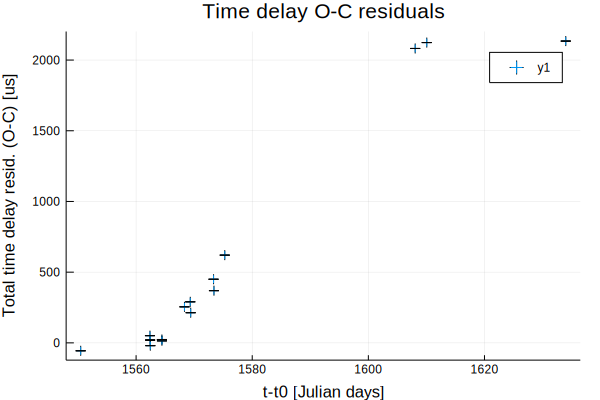

In [144]:
scatter(
    tv_neodys_obs[tv_del_ind .+ 1].-t0,
    residual_td(),
    yerror=Float64.(jpl_radar[del_ind,4]),
    marker=:cross
)
title!("Time delay O-C residuals")
xlabel!("t-t0 [Julian days]")
ylabel!("Total time delay resid. (O-C) [us]")

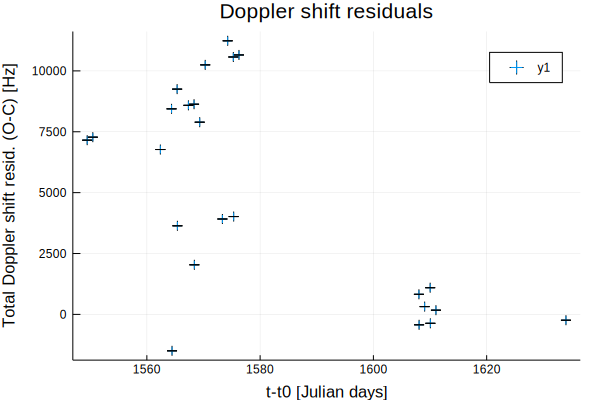

In [145]:
scatter(
    tv_neodys_obs[tv_dop_ind .+ 1].-t0,
    residual_ds(),
    yerror=Float64.(jpl_radar[dop_ind,4]),
    marker=:cross
)
title!("Doppler shift residuals")
xlabel!("t-t0 [Julian days]")
ylabel!("Total Doppler shift resid. (O-C) [Hz]")

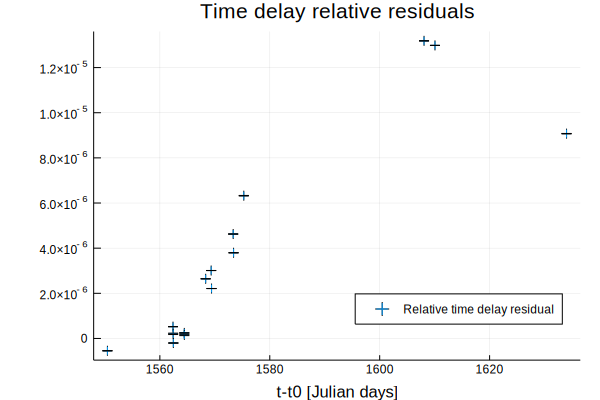

In [146]:
scatter(
    tv_neodys_obs[tv_del_ind .+ 1].-t0,
    rel_res_td(),
    yerror=Float64.(jpl_radar[del_ind,4])./Float64.(jpl_radar[del_ind,3]),
    label="Relative time delay residual",
    marker=:cross,
    legend=:bottomright
)
title!("Time delay relative residuals")
xlabel!("t-t0 [Julian days]")

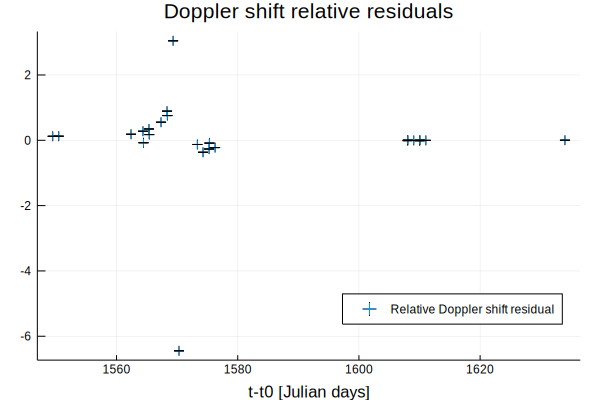

In [147]:
scatter(
    tv_neodys_obs[tv_dop_ind .+ 1].-t0,
    rel_res_ds(),
    yerror=Float64.(jpl_radar[dop_ind,4])./Float64.(jpl_radar[dop_ind,3]),
    label="Relative Doppler shift residual",
    legend=:bottomright,
    marker=:cross
)
title!("Doppler shift relative residuals")
xlabel!("t-t0 [Julian days]")

# Yarkovsky $A_2$ coefficient estimation

In [49]:
tdelay_v1[1] # τ(A2) = p(A2)

 0.0011943409419197656 - 3.8610876029069896e-10 t + 1.988031561383505e-17 t² + 6.958098694843759e-24 t³ + 2.0777966047253667e-30 t⁴ + 5.553832430524041e-37 t⁵ + 1.2457772014910882e-43 t⁶ + 1.8902090882249298e-50 t⁷ - 1.0076319463743072e-57 t⁸ - 2.3310933713820349e-63 t⁹ - 1.1918935901769492e-69 t¹⁰ + 𝒪(t¹¹)

In [50]:
tdelay_v1[1]-constant_term(tdelay_v1[1]) # δτ(A2) = τ(A2) - τ(A2=0) = p(A2) - τ(A2=0) = p[1]*A2+p[2]*A2^2+... ( p[0]=τ(A2=0) )

 - 3.8610876029069896e-10 t + 1.988031561383505e-17 t² + 6.958098694843759e-24 t³ + 2.0777966047253667e-30 t⁴ + 5.553832430524041e-37 t⁵ + 1.2457772014910882e-43 t⁶ + 1.8902090882249298e-50 t⁷ - 1.0076319463743072e-57 t⁸ - 2.3310933713820349e-63 t⁹ - 1.1918935901769492e-69 t¹⁰ + 𝒪(t¹¹)

In [51]:
inverse( tdelay_v1[1]-constant_term(tdelay_v1[1]) ) # A2(δτ) = q(δτ) = q[1]*δτ+q[2]*δτ^2+... (q[0]=0)

 - 2.589943826312322e9 t + 3.453777126506572e11 t² - 4.051921337537115e14 t³ + 4.815926298606107e17 t⁴ - 6.032796403440988e20 t⁵ + 7.875681252157259e23 t⁶ - 1.0626861287518685e27 t⁷ + 1.4722843161356464e30 t⁸ - 2.083612015686971e33 t⁹ + 3.0003353365322875e36 t¹⁰ + 𝒪(t¹¹)

In [52]:
td_us = 1e6*86400*tdelay_v1[tv_del_ind]
ds_Hz = dshift_v1[tv_dop_ind];

In [53]:
A2_δτ_v = (  inverse.( td_us-td_us() )  ) # vector of A2(δr) polynomials at each delay observation;
A2_δf_v = (  inverse.( ds_Hz-ds_Hz() )  ) # vector of A2(δvr) polynomials at each Doppler observation;

In [54]:
A2_del_v = map((x,y)->x(y), A2_δτ_v, residual_td()); # A2(δτ) polynomials evaluated at the O-C time delay residuals;
A2_dop_v = map((x,y)->x(y), A2_δf_v, residual_ds()); # A2(δf_Doppler) polynomials evaluated at the O-C Doppler shift residuals;

In [55]:
A2_del_v

15-element Array{Float64,1}:
   1.694475496631968 
  -1.9573259702952874
  -0.7674880599051079
   0.7581075699286779
  -0.9827993080444958
  -0.6283416666189819
 -12.663550873935371 
 -15.290026930662599 
 -11.28877205831485  
 -32.03267548714954  
 -26.47233117744979  
 -53.90060222476219  
  85.16446956300031  
  82.67729672535704  
  59.834208148992445 

In [56]:
A2_dop_v

24-element Array{Float64,1}:
 -265283.10052892094 
 -235444.14393136185 
  -81038.68001292447 
  -91474.54866117197 
   15760.887459451578
  -95763.28737818934 
  -37099.30319664079 
  -81311.54588335915 
  -78632.74109285197 
  -18310.655165250806
  -69285.46923256479 
  -87418.90308873261 
  -30662.73441391626 
  -86912.62252051094 
  -80378.0584904174  
  -30399.01241004496 
  -79951.9133098392  
  -45899.17962823272 
   24145.478139160106
  -18579.05181733395 
  -65377.78040249069 
   22255.210196866567
  -10825.65754666271 
   29626.91528698097 

In [57]:
mean(A2_del_v), std(A2_del_v)

(4.942976249784816, 40.05810487126123)

In [58]:
mean(A2_dop_v), std(A2_dop_v)

(-62427.49573453992, 70602.88471631476)

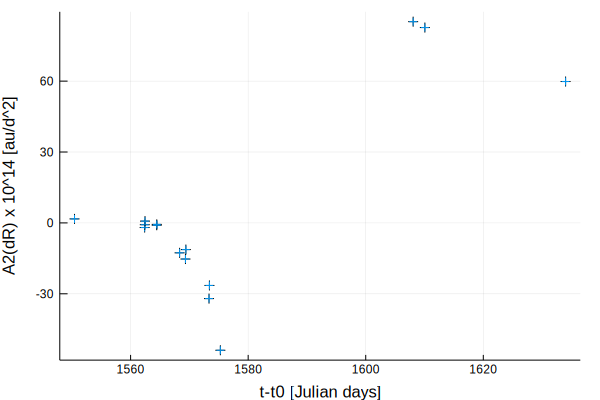

In [59]:
scatter(tv_neodys_obs[tv_del_ind .+ 1].-t0, A2_del_v, leg=false, marker=:cross)
xlabel!("t-t0 [Julian days]")
ylabel!("A2(dR) x 10^14 [au/d^2]")

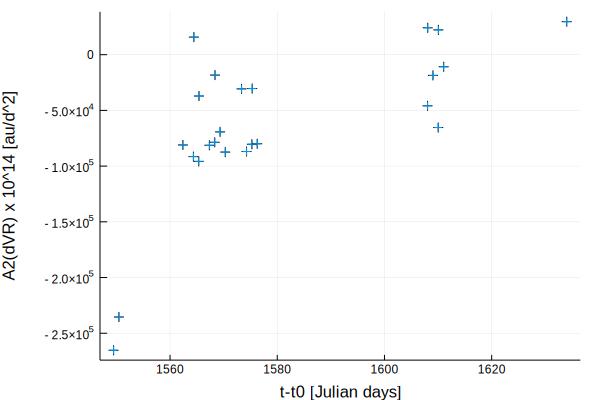

In [60]:
scatter(tv_neodys_obs[tv_dop_ind .+ 1].-t0, A2_dop_v, leg=false, marker=:cross)
xlabel!("t-t0 [Julian days]")
ylabel!("A2(dVR) x 10^14 [au/d^2]")

In [ ]:
using IntervalArithmetic

In [ ]:
residual_r_interval = interval.(rv1()-(del[del_ind,6]+del[del_ind,7])/au, rv1()-(del[del_ind,6]-del[del_ind,7])/au)
residual_vr_interval = interval.(vrv1()-(dop[dop_ind,6]+dop[dop_ind,7])/au, vrv1()-(dop[dop_ind,6]-dop[dop_ind,7])/au);

In [ ]:
A2_del_v_interval = map((x,y)->x(y), A2_δr_v, residual_r_interval); # A2(δr) polynomials evaluated at the δr residuals;
A2_dop_v_interval = map((x,y)->x(y), A2_δvr_v, residual_vr_interval); # A2(δvr) polynomials evaluated at the δvr residuals;

In [ ]:
scatter(tv_neodys_obs[del_neodys_obs_ind].-t0, A2_del_v, yerror=radius.(A2_del_v_interval), leg=false, marker=:cross)

In [ ]:
scatter(tv_neodys_obs[dop_neodys_obs_ind].-t0, A2_dop_v, yerror=radius.(A2_dop_v_interval), leg=false, marker=:cross)